In [ ]:
pip install opendatasets

In [ ]:
pip install pandas


In [ ]:
import opendatasets as od
import pandas

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manvimahe
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection


100%|██████████| 222M/222M [00:07<00:00, 33.1MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir("/content/face-mask-detection")
Dataset='Dataset'
Data_dir=os.listdir(Dataset)
print(Data_dir)


['without_mask', 'mask_weared_incorrect', 'with_mask']


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [ ]:
# labels=[]
# for category in Data_dir:
#   labels.append(category)
#   print(category)

# print(labels)

In [ ]:
img_rows, img_cols=112, 112

images=[]
labels=[]



#preprocessing the image and getting an image and labels array
for category in Data_dir:
  folder_path= os.path.join(Dataset, category)
  for img in os.listdir(folder_path):
    img_path= os.path.join(folder_path, img)
    img=cv2.imread(img_path)

    try:
      grayscale_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      resized_img=cv2.resize(grayscale_img, (img_rows, img_cols))
      images.append(resized_img)
      labels.append(category)

    except Exception as e:
      print('Exception :', e)

images=np.array(images)/255.0
images=np.reshape(images, (images.shape[0], img_rows, img_cols, 1))
print(labels)

['without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'withou

In [ ]:
print(labels)

['without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'without_mask', 'withou

In [ ]:
#one hot encoding

label_to_int = {label: idx for idx, label in enumerate(Data_dir)}
int_labels = np.array([label_to_int[label] for label in labels])

num_classes = len(Data_dir)
labels = to_categorical(int_labels, num_classes)
(train_X, test_X, train_Y, test_Y)=train_test_split(images, labels, test_size=0.25, random_state=0);

In [ ]:
labels.shape

print(labels)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


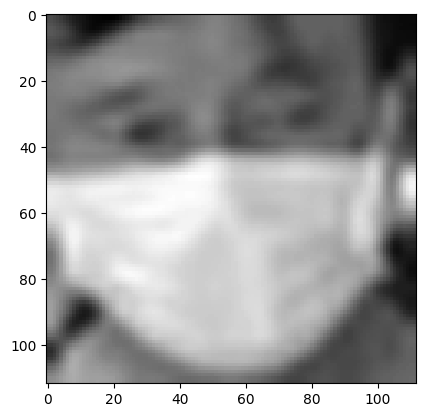

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_X[10], cmap='gray')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D

num_classes=3
batch_size=32

model=Sequential()

model.add(Conv2D(64,(3,3), input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 64)      640       
                                                                 
 activation (Activation)     (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 53, 53, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 128)       0         
 g2D)                                                   

In [ ]:
pip install pydot pydot-ng graphviz




SyntaxError: invalid syntax (<ipython-input-16-4057842bec59>, line 1)

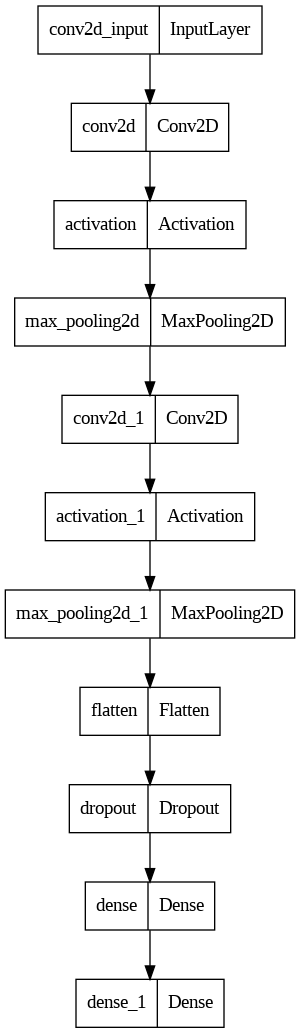

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='face_mask.png')

In [ ]:
from keras.optimizers import Adam

epochs=50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
fitted_model=model.fit(train_X, train_Y, epochs=epochs, validation_split=0.25)


Epoch 1/50
158/158 [==============================] - 11s 34ms/step - loss: 0.7219 - accuracy: 0.6797 - val_loss: 0.3616 - val_accuracy: 0.8640
Epoch 2/50
158/158 [==============================] - 4s 24ms/step - loss: 0.3311 - accuracy: 0.8729 - val_loss: 0.3155 - val_accuracy: 0.8830
Epoch 3/50
158/158 [==============================] - 4s 24ms/step - loss: 0.2616 - accuracy: 0.9012 - val_loss: 0.2421 - val_accuracy: 0.9133
Epoch 4/50
158/158 [==============================] - 4s 25ms/step - loss: 0.1962 - accuracy: 0.9349 - val_loss: 0.2508 - val_accuracy: 0.9074
Epoch 5/50
158/158 [==============================] - 4s 25ms/step - loss: 0.1577 - accuracy: 0.9448 - val_loss: 0.2195 - val_accuracy: 0.9317
Epoch 6/50
158/158 [==============================] - 4s 24ms/step - loss: 0.1186 - accuracy: 0.9616 - val_loss: 0.2453 - val_accuracy: 0.9240
Epoch 7/50
158/158 [==============================] - 4s 22ms/step - loss: 0.1010 - accuracy: 0.9640 - val_loss: 0.2297 - val_accuracy: 0.931

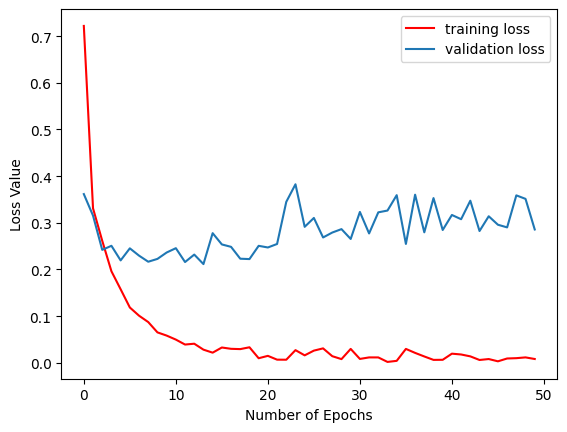

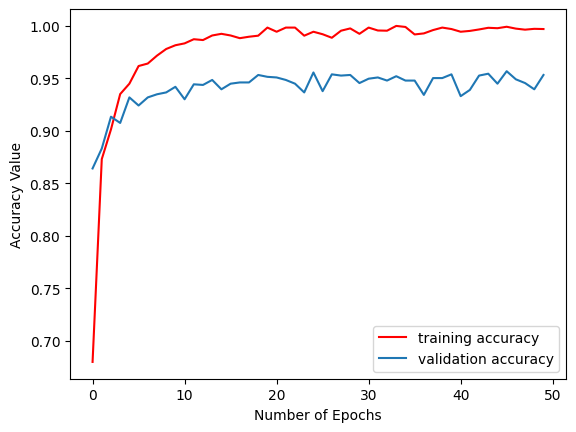

In [ ]:
plt.plot(fitted_model.history['loss'], 'r', label='training loss')
plt.plot(fitted_model.history['val_loss'], label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


plt.plot(fitted_model.history['accuracy'], 'r', label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [ ]:
model.save('face_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
